## Bird Song Classification Data Training
#### Author: Santiago Miro 2024

This notebook will focus on training machine learning models using the pre-processed data set "Bird Song Data Set," which was obtained from [Kaggle](https://www.kaggle.com/datasets/vinayshanbhag/bird-song-data-set). The data set consists of recordings of bird songs from five different species, namely:

* Bewick's Wren
* Northern Cardinal
* American Robin
* Song Sparrow
* Northern Mockingbird

The recordings were sourced from [Xeno-canto](https://www.xeno-canto.org/) and are limited to songs only, excluding other types of calls like alarm calls or scolding calls. Moreover, only recordings graded as highest quality on the Xeno-canto API were included to ensure data consistency.

The original mp3 recordings were converted to the wav format, standardized to a sampling rate of 22050 samples/sec, and converted to single-channel audio. Additionally, the recordings were clipped to exactly 3 seconds using onset detection, ensuring that a portion of the target bird's song is captured in each clip.

The accompanying CSV file contains metadata for each recording, including information such as genera, species, location, datetime, source URL, recordist, and license details. Each entry in the filename column of the CSV corresponds to a wav file located in the 'wavfiles' folder. 

In this notebook, we will a CNN model and a Random Forest for comparison to classify and identify bird species based on their songs.

In [1]:
import pickle as pkl
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.models import save_model
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
f = open('processed_data.pkl','rb')
processed_data = pkl.load(f)
f.close()

f = open('processed_labels.pkl','rb')
processed_labels = pkl.load(f)
f.close()

X_train, X_test, y_train, y_test = train_test_split(processed_data, processed_labels, test_size=0.2, random_state=42)

In [4]:
X_train = X_train[..., np.newaxis]  # Add a channel dimension
X_test = X_test[..., np.newaxis]

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

In [5]:
# Original classes
original_classes = label_encoder.classes_

print("Original classes:", original_classes)

# Mapping of encoded labels to original classes
for encoded_label in range(len(original_classes)):
    print(f"{encoded_label} -> {original_classes[encoded_label]}")


Original classes: ['American Robin' "Bewick's Wren" 'Northern Cardinal'
 'Northern Mockingbird' 'Song Sparrow']
0 -> American Robin
1 -> Bewick's Wren
2 -> Northern Cardinal
3 -> Northern Mockingbird
4 -> Song Sparrow


In [6]:
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train_encoded)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_shuffled, y_train_shuffled, test_size=0.1, random_state=42)

In [7]:
X_train_shuffled.shape

(4337, 13, 130, 1)

In [8]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(13, 130, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.00001)
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
# Train the model
history = model.fit(X_train, y_train, batch_size=64,
                    steps_per_epoch=int(len(X_train) / 32),
                    epochs=22,
                    validation_data=(X_valid, y_valid))#,callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

C:\Users\mirot\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/22
 61/121 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.4048 - loss: 1.3558

C:\Users\mirot\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.4474 - loss: 1.2676 - val_accuracy: 0.6751 - val_loss: 0.8831
Epoch 2/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.6272 - loss: 0.9034 - val_accuracy: 0.7189 - val_loss: 0.7549
Epoch 3/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.6836 - loss: 0.7875 - val_accuracy: 0.7281 - val_loss: 0.6750
Epoch 4/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.7568 - loss: 0.6449 - val_accuracy: 0.7742 - val_loss: 0.6120
Epoch 5/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.7899 - loss: 0.5790 - val_accuracy: 0.7742 - val_loss: 0.5717
Epoch 6/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.8225 - loss: 0.4873 - val_accuracy: 0.7627 - val_loss: 0.5704
Epoch 7/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.8400 - loss: 0.4334 - val_accuracy: 0.7834 - val_loss: 0.5295
Epoch 8/22
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8696 - loss: 0.3780 - val_accuracy: 0.8

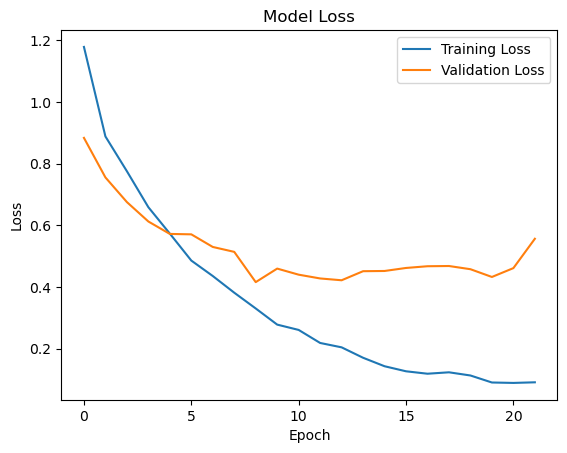

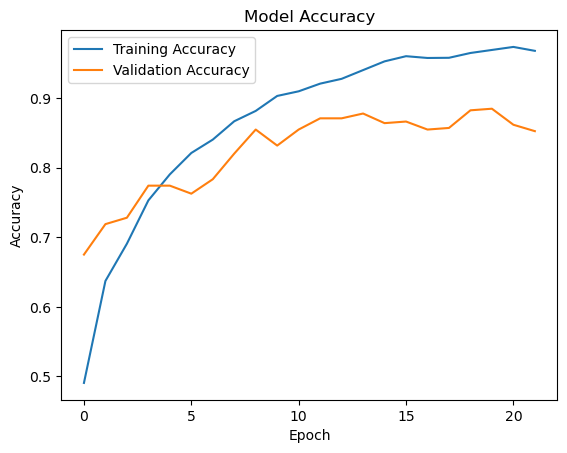

In [9]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:
# Save model and history
save_model(model, 'cnn_model.keras')

f = open('history.pkl','wb')
pkl.dump(history,f)
f.close()

In [5]:
# Test model performance
cnn_model = load_model('path\\to\\model\\cnn_model.keras')
predicted_probabilities = cnn_model.predict(X_test)

confidences = []
for sample in predicted_probabilities:
    confidences.append(np.max(sample))

C:\Users\mirot\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


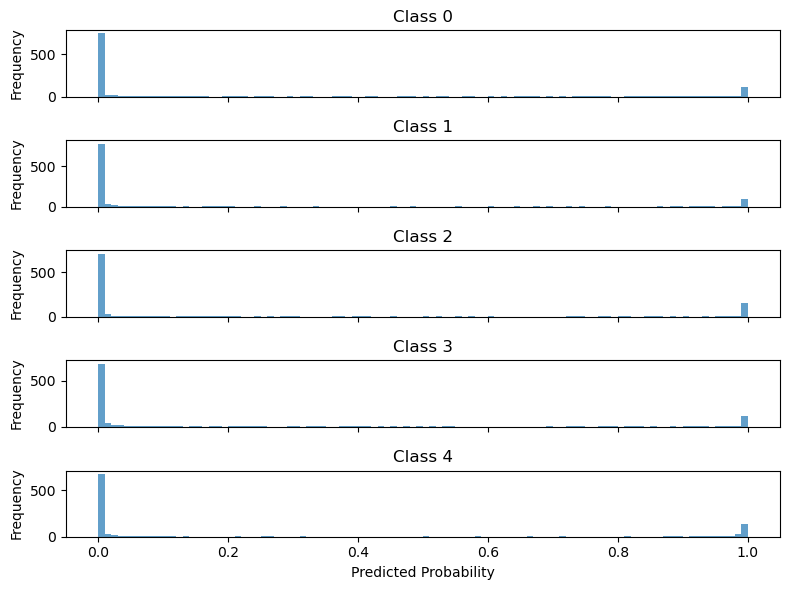

In [18]:
num_classes = predicted_probabilities.shape[1]
fig, axs = plt.subplots(num_classes, 1, figsize=(8, 6), sharex=True)
for class_idx in range(num_classes):
    axs[class_idx].hist(predicted_probabilities[:, class_idx], bins=100, alpha=0.7)
    axs[class_idx].set_title(f'Class {class_idx}')
    axs[class_idx].set_ylabel('Frequency')
plt.xlabel('Predicted Probability')
plt.tight_layout()
plt.show()

In [68]:
### FOR SPECTROGRAMS

f = open('processed_spec.pkl','rb')
processed_spec = pkl.load(f)
f.close()

f = open('processed_labels.pkl','rb')
processed_labels = pkl.load(f)
f.close()

X_train, X_test, y_train, y_test = train_test_split(processed_spec, processed_labels, test_size=0.2, random_state=42)

X_train = X_train[..., np.newaxis]  # Add a channel dimension
X_test = X_test[..., np.newaxis]

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train_encoded)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_shuffled, y_train_shuffled, test_size=0.1, random_state=42)

In [20]:
X_train.shape

(3903, 1025, 130, 1)

In [22]:
# Define CNN model
model_spec = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(1025, 130, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.00001)
# Compile the model
model_spec.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
# Train the model
history_spec = model_spec.fit(X_train, y_train, batch_size=32,
                    #steps_per_epoch=int(len(X_train) / 32),
                    epochs=25,
                    validation_data=(X_valid, y_valid))#,callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model_spec.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 461s 4s/step - accuracy: 0.4152 - loss: 17.1309 - val_accuracy: 0.6290 - val_loss: 0.9457
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 484s 4s/step - accuracy: 0.7484 - loss: 0.6967 - val_accuracy: 0.6912 - val_loss: 0.8133
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 470s 4s/step - accuracy: 0.8762 - loss: 0.3618 - val_accuracy: 0.6682 - val_loss: 0.8757
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 463s 4s/step - accuracy: 0.9345 - loss: 0.2034 - val_accuracy: 0.6843 - val_loss: 0.9311
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 467s 4s/step - accuracy: 0.9475 - loss: 0.1575 - val_accuracy: 0.6843 - val_loss: 1.2708
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 466s 4s/step - accuracy: 0.9668 - loss: 0.1180 - val_accuracy: 0.6866 - val_loss: 1.2184
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 465s 4s/step - accuracy: 0.9682 - loss: 0.1217 - val_accuracy: 0.6820 - val_loss: 1.4178
Epoch 8/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 464s 4s/step - accuracy: 0.9764 - loss: 0.0887 - val_acc

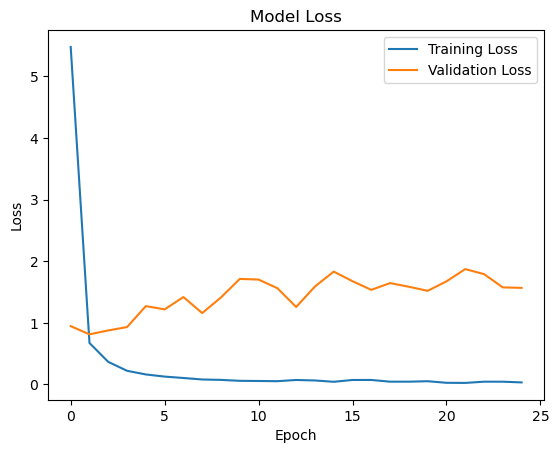

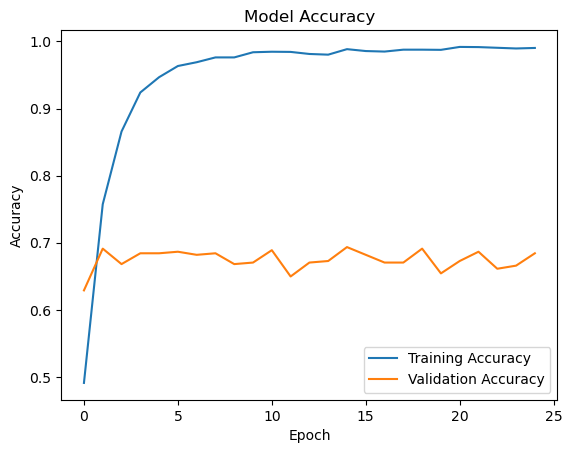

In [23]:
# Plot training & validation loss
plt.plot(history_spec.history['loss'], label='Training Loss')
plt.plot(history_spec.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(history_spec.history['accuracy'], label='Training Accuracy')
plt.plot(history_spec.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(processed_data, processed_labels, test_size=0.2, random_state=42)


# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train_encoded)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_shuffled, y_train_shuffled, test_size=0.1, random_state=42)
# Reshape X_train
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [36]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4433179723502304
